In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

Frequenz: 100 Hz, Phasenverschiebung: 5.1 ms, Spitze: 23.63 mV
Frequenz: 200 Hz, Phasenverschiebung: 0.653 ms, Spitze: 93.87 mV
Frequenz: 300 Hz, Phasenverschiebung: 3.23 ms, Spitze: 62.29 mV
Frequenz: 400 Hz, Phasenverschiebung: 2.185 ms, Spitze: 44.56 mV
Frequenz: 500 Hz, Phasenverschiebung: 1.728 ms, Spitze: 38.34 mV
Frequenz: 700 Hz, Phasenverschiebung: 1.213 ms, Spitze: 29.43 mV
Frequenz: 850 Hz, Phasenverschiebung: 0.97 ms, Spitze: 28.12 mV
Frequenz: 1000 Hz, Phasenverschiebung: 0.8 ms, Spitze: 26.12 mV
Frequenz: 1200 Hz, Phasenverschiebung: 0.642 ms, Spitze: 25.96 mV
Frequenz: 1500 Hz, Phasenverschiebung: 0.488 ms, Spitze: 25.96 mV
Frequenz: 1700 Hz, Phasenverschiebung: 0.414 ms, Spitze: 25.52 mV
Frequenz: 2000 Hz, Phasenverschiebung: 0.333 ms, Spitze: 26.82 mV
Frequenz: 3000 Hz, Phasenverschiebung: 0.195 ms, Spitze: 25.0 mV
Frequenz: 4000 Hz, Phasenverschiebung: 0.19 ms, Spitze: 31.58 mV
Frequenz: 5000 Hz, Phasenverschiebung: 0.049 ms, Spitze: 23.36 mV
Frequenz: 6000 Hz, Phasen

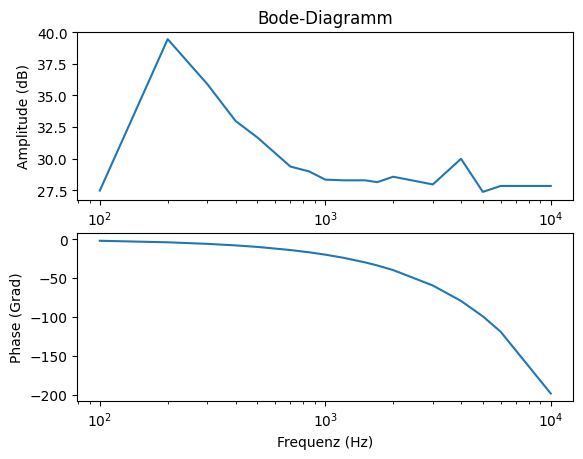

In [4]:
# Funktion zum Einlesen der Daten aus der CSV-Datei
def read_data(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        next(reader)  # Überspringe Header
        for row in reader:
            frequency = int(row[0].strip())
            phase_shift_str = row[1].strip()
            if 'ms' in phase_shift_str:
                phase_shift = float(phase_shift_str.replace(' ms', ''))
            elif 'micro' in phase_shift_str:
                phase_shift = float(phase_shift_str.replace(' micro', '')) / 1000  # Umrechnung von micros zu ms
            else:
                raise ValueError("Ungültige Einheit für die Phasenverschiebung.")
            peak = float(row[2].strip())
            data.append((frequency, phase_shift, peak))
    return data

# Beispielaufruf
file_path = 'aufgabe3(LautsprecherGross).csv'  # Passe den Dateipfad entsprechend an
dataset = read_data(file_path)

# Ausgabe der eingelesenen Daten
for entry in dataset:
    print(f"Frequenz: {entry[0]} Hz, Phasenverschiebung: {entry[1]} ms, Spitze: {entry[2]} mV")

# Aufbereitung der Daten für das Bode-Diagramm
frequencies = [entry[0] for entry in dataset]  # Frequenzen in Hz
amplitudes = [20 * np.log10(entry[2]) for entry in dataset]  # Amplituden in dB (angenommen, dass entry[2] die Amplitude ist)
phase_angles = [-entry[1] * freq * 360 * 1e-3 for freq, _, _ in dataset]  # Phasenwinkel in Grad

# Erstellen des Bode-Diagramms
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, amplitudes)
plt.title('Bode-Diagramm')
plt.ylabel('Amplitude (dB)')

plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase_angles)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phase (Grad)')
plt.show()
